In [20]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # to plot inage, graph
import time

%matplotlib inline

# Load the MNIST dataset from scikit-learn
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target


In [26]:
X.iloc[:3]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(-0.5, 27.5, 27.5, -0.5)

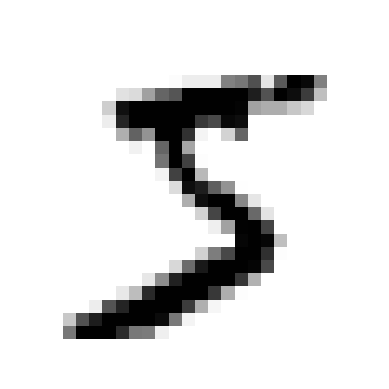

In [43]:
image1 = X.iloc[0]
image1 = list(image1)
image1 = np.array(image1)
image1 = image1.reshape(28,28)

import matplotlib.pyplot as plt
plt.imshow(image1, cmap = plt.cm.gray_r)
plt.axis('off')

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = OneVsRestClassifier(KNeighborsClassifier())

# Create a KNN classifier with k=7
knn = KNeighborsClassifier(n_neighbors=7)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Use the trained KNN classifier to make predictions on the test data
predictions = knn.predict(X_test)


/Users/vimarshrana/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:
%time
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
KNN Accuracy: 0.969


In [46]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9687142857142857


In [47]:
# to create nice confusion metrics
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.9687142857142857')

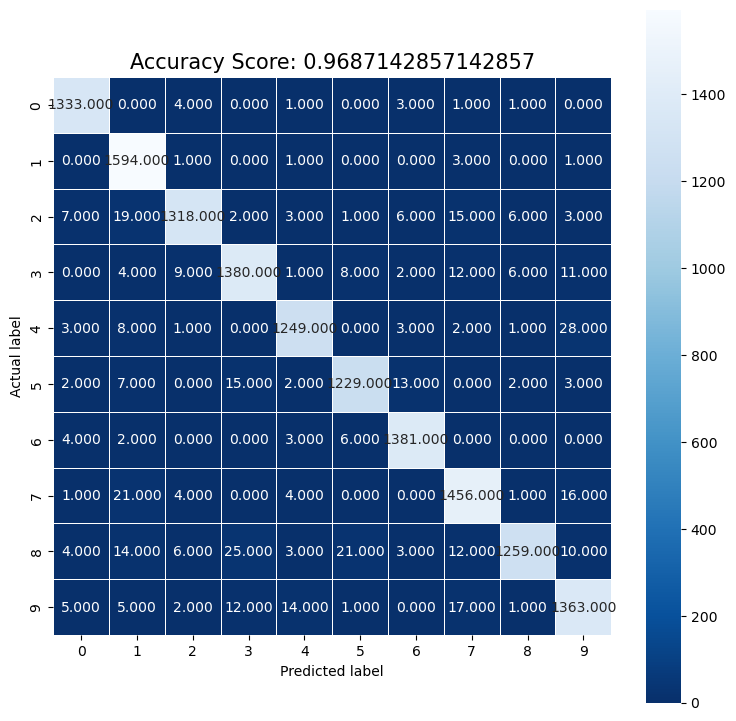

In [48]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)